In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("cars24-car-price-cleaned.csv")
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [28]:
df["make"].nunique()

41

In [29]:
df["model"].nunique()

3233

In [32]:
#df["model"].value_counts()

In [33]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [35]:
df.shape

(19820, 18)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13874, 17), (13874,), (5946, 17), (5946,))

In [39]:
df.corr()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
selling_price,1.000000,0.390667,-0.100739,-0.314927,0.652296,0.770390,-0.390667,0.749553,0.968059,-0.201808,-0.019547,0.335236,0.019073,-0.053388,-0.313570,-0.582019,-0.234645,0.223282
year,0.390667,1.000000,-0.310288,0.262772,-0.054552,0.074124,-1.000000,-0.007605,0.332411,-0.017124,0.063389,0.026316,0.004328,-0.072595,-0.025883,-0.108357,-0.002936,0.023967
km_driven,-0.100739,-0.310288,1.000000,-0.090059,0.169491,0.007457,0.310288,0.024116,-0.069615,0.091550,-0.049455,0.249679,-0.002327,0.014153,-0.249359,0.084569,-0.136180,0.151401
mileage,-0.314927,0.262772,-0.090059,1.000000,-0.586985,-0.473775,-0.262772,-0.397677,-0.331557,0.069013,0.027321,0.108808,0.228299,-0.023325,-0.159073,0.263190,0.371743,-0.379429
engine,0.652296,-0.054552,0.169491,-0.586985,1.000000,0.791340,0.054552,0.631664,0.673462,-0.113243,-0.051005,0.453970,-0.001711,-0.049141,-0.425312,-0.368639,-0.517424,0.515238
max_power,0.770390,0.074124,0.007457,-0.473775,0.791340,1.000000,-0.074124,0.719000,0.794316,-0.195152,-0.031343,0.261586,-0.002934,-0.052945,-0.231222,-0.543705,-0.225431,0.194063
age,-0.390667,-1.000000,0.310288,-0.262772,0.054552,-0.074124,1.000000,0.007605,-0.332411,0.017124,-0.063389,-0.026316,-0.004328,0.072595,0.025883,0.108357,0.002936,-0.023967
make,0.749553,-0.007605,0.024116,-0.397677,0.631664,0.719000,0.007605,1.000000,0.774284,-0.195263,-0.033878,0.263077,0.012934,-0.027413,-0.244855,-0.552433,-0.147503,0.118870
model,0.968059,0.332411,-0.069615,-0.331557,0.673462,0.794316,-0.332411,0.774284,1.000000,-0.197741,-0.023565,0.346297,0.018631,-0.055150,-0.323890,-0.600678,-0.242382,0.230705
Individual,-0.201808,-0.017124,0.091550,0.069013,-0.113243,-0.195152,0.017124,-0.195263,-0.197741,1.000000,-0.078776,0.014671,-0.005793,0.030982,-0.007934,0.217977,-0.049738,0.056523


In [40]:
X1=X[['model']]
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X1_train, y_train)

LinearRegression()

In [42]:
model.coef_

array([0.99895063])

In [43]:
model.intercept_

0.0011758882737265552

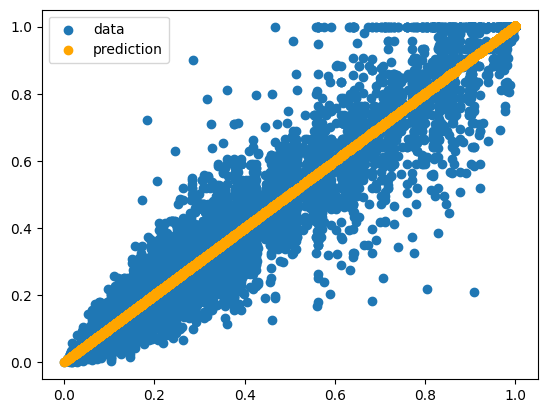

In [44]:
y_hat = model.predict(X1)
fig = plt.figure()
plt.scatter(X1,y,label='data')
plt.scatter(X1,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()


In [45]:
X.shape, y.shape


((19820, 17), (19820,))

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
model.coef_

array([ 7.49730208e+11, -2.59887695e-01, -2.70412327e-01,  6.57677103e-02,
        4.88517201e-02,  7.49730208e+11,  7.06176427e-02,  8.57008692e-01,
       -7.05460210e-03, -4.85337803e-03,  4.67648413e-03,  1.94251661e-01,
        1.22025898e-02, -8.86559439e-03, -3.51156133e-03, -1.36865793e-02,
       -2.15629145e-02])

In [48]:
model.intercept_

-749730208117.6854